# **Designing a classifier for content moderation - Images and Video**

# *Microtask T264938:  Comparison of existing NSFW datasets*

---------------------------------------
**Popular Datasets for Object Detection**

Datasets such as MNIST and VisualQA have been removed from consideration because of the lack of diverse features in the images as well as the core content. For instance, VisualQA may assist in training purposes that determine the orientation of the object, or its placement. This is of lesser significance than ascertaining the presence of those objects in the pictures/frames - which is the core problem in an NSFW classifier. Some of the most popular datasets which do include a wide range of categories are:

1.  COCO: Used for object segmentation. Around 330,000 images with 80 object categories and 5 captions per image. Link: http://cocodataset.org/#home.
Upon examining the dataset, I was not able to find any NSFW images to train on, so this dataset will most likely not be of any help.

2. ImageNet: Around 1.5 million images organized according to the WordNet heirarchy. http://www.image-net.org/.
Owing to its sheer size, I was able to find a number of NSFW images in this dataset that could be trained on. Here's a post that identifies similar images: https://www.reddit.com/r/MachineLearning/comments/d9mhfg/d_on_pornographic_nsfw_and_nonconsensual_images/?utm_medium=android_app&utm_source=share. Additionally, these images are under the categories "bikini, two-piece", "brassiere, bra, bandeau" and the likes. Certain limitations in this case are: low amount of actual NSFW content to train on and the fact that these images aren't classified under a specific NSFW category, which means that one might have to pre-determine what categories might have the most amount of NSFW content.
---------------------------------------

**A more relevant solution**

In order to identify what is NSFW, the architecture needs to know how NSFW content looks like and develop a hypothesis that approximates the actual function which determines the result. It is not feasible to develop an entire dataset from scratch with labelling, and hence, I propose an amalgamation of existing extremely relevant datasets and web scraping.

The relevant datasets in question are:

1. "NSFW Data Scrapper" by Data Scientist Alexander Kim: This includes 220,000 NSFW images. Limitations: the categories were not well-defined, and many images were misclassified. Link: https://github.com/alex000kim/nsfw_data_scraper

2. "NSFW Data Source URLs" developed by Data Scientist Evgeny Bazarov: This is a much larger, high-quality image dataset of sexually explicit images containing over 1.58 million data volumes in 159 categories. Link: https://github.com/EBazarov/nsfw_data_source_urls

3. "NSFW Dataset" by Kaggle user Vareza Noorliko: Contains around 200 images - animated. Link: https://www.kaggle.com/drakedtrex/my-nsfw-dataset?

4. NudeNet Classifier Dataset: 18 GB worth of labelled NSFW images. Link: https://archive.org/details/NudeNet_classifier_dataset_v1

5. Crawl Reddit using PRAW: Collect images from different subreddits and store them in NSFW and SFW folders. Via this technique, one can expect around 500 NSFW and 500 SFW images. 

6. Web scraping Wikimedia Commons: In addition to an amalgamation of the above datasets, web scraping of the Wikimedia commons collection of media can also be conducted. There are 2 possible ways via which images can be selected for inclusion:

> -> Review all images that have been scraped and individually select those that can be classified as NSFW. Pros: image inclusion in dataset with 100% certainty 
Cons: a mammoth task

> -> Train an intermediate CNN architecture using the pre-existing datasets and run it on the scraped images to pick out those that are similar. 
Pros: computational time is lower for this method than for individual selection 
Cons: some images may be misclassified as NSFW.

An easy way to web scrape is mentioned in: https://www.google.com/amp/s/www.parsehub.com/blog/scrape-images-website/amp/

An alternative way would be to develop a Python script using PIL.

---------------------------------------

# *Microtask T264056: Comparison of existing NSFW classifiers*

Now that we have a fairly competent dataset for training, validation, and testing purposes, the next step is to determine a classifier. The classifier could either be binary in nature (NSFW, not NSFW) or multi-class in nature (not NSFW, NSFW-Violence, NSFW-Nudity etc). Since the specific categorical labels are not defined for all images in the dataset and there may be a requirement of combining multiple subcategories into one, the binary classifier would be more feasible. But then, the second type of classifier gives more insights on the type of NSFW content, which might be required if a particular image must exist in all relevant categories, not just NSFW.

---------------------------------------

**List of current NSFW Classifiers**

1. *Yahoo's NSFW classifier* (a bit outdated)

> **Introduction**:  
Developed by Yahoo, this architecture uses the Caffe deep learning library and the CaffeOnSpark. Although the original dataset that it was trained on will not be released for security purposes, the architecture and implementation has been explained.

> **Computational requirements**:  
The architecture uses the thin ResNet 50 model. The original ResNet 50 model is quite computationally expensive, so it can be altered by reducing the number of filters to half the amount of original filters - which also reduces the number of parameters significantly, and this resulting model is called the thin ResNet 50 model. The thin ResNet 50 model provides good tradeoff in terms of accuracy, and the model is lightweight in terms of runtime (takes < 0.5 sec on CPU) and memory (~23 MB).

> **Implementation - methods and procedures**:  
While training, the images were resized to 256x256 pixels, horizontally flipped for data augmentation, and randomly cropped to 224x224 pixels, and were then fed to the network. Scale augmentation was used to avoid overfitting.
The deep model was first pretrained on ImageNet 1000 class dataset. Then the weights were finetuned on the NSFW dataset. The thin resnet 50 1by2 architecture was used as the pretrained network. The model was generated using pynetbuilder tool and replicates the residual network paper's 50 layer network (with half number of filters in each layer). 

Resnet 50 1by2 was selected after comparing test results with other pretrained networks:

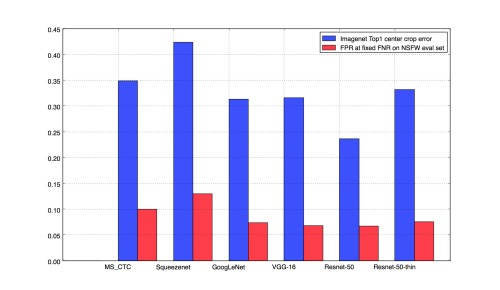

Link 1: https://yahooeng.tumblr.com/post/151148689421/open-sourcing-a-deep-learning-solution-for

Link 2: https://github.com/GantMan/nsfw_model  

Link 3: https://github.com/legolas123/cv-tricks.com/tree/master/Tensorflow-tutorials/Not-Safe-For-Work-Detection

---------------------------------------

2. *InceptionV3*

> **Introduction**:  
This method uses transfer learning with the InceptionV3 architecture that has been weighted with ImageNet.

> **Computational requirements**:  
Definitely not as lightweight as the Resnet 50 1by2. But is still doable on a CPU.

> **Implementation - methods and procedures**:  
 The new architecture is a combination of the original v3 architecture along with 3 new layers, which are: a 256 hidden neuron layer, a 128 hidden neuron layer, and an output layer that uses softmax. The new layers are regularised (L2) to prevent overfitting. 

 After fine tuning, the resulting confusion matrix is as follows:

 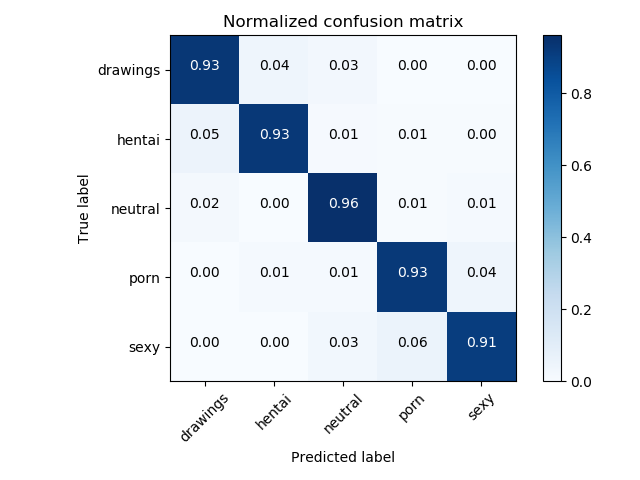
 
 Link: https://www.freecodecamp.org/news/how-to-set-up-nsfw-content-detection-with-machine-learning-229a9725829c/

 ---------------------------------------

3. *Mobile Net Architecture*

> **Introduction**:  
MobileNet is a streamlined architecture that uses depthwise separable convolutions to construct lightweight deep convolutional neural networks and provides an efficient model for mobile and embedded vision applications. 

> **Computational requirements**:  
The model structure puts nearly all of the computation into dense 1 × 1 convolutions. This can be implemented with highly optimized general matrix multiply(GEMM) functions. Often convolutions are implemented by a GEMM but require an initial reordering in memory called im2col in order to map it to a GEMM. 1×1 convolutions do not require this reordering in memory and can be implemented directly with GEMM which is one of the most optimized numerical linear algebra algorithms. MobileNet spends 95% of its computation time in 1 × 1 convolutions which also has 75% of the parameters.

> **Implementation - methods and procedures**:  
This deep learning model uses transfer learning and the MobileNetV2 architecture. This architecture has lesser parameters than all other models described in this study and is suitable for mobile applications as well. At the end of the architecture, a single dense layer with 32 units, batch normalization, and dropout was added.  

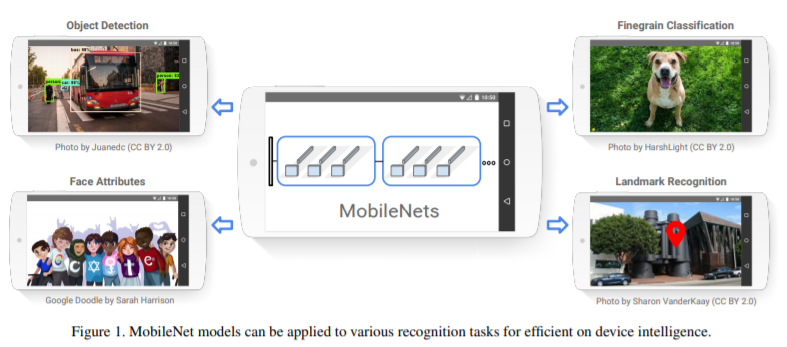  
Link 1: https://github.com/lakshaychhabra/NSFW-Detection-DL  
Link 2: https://medium.com/analytics-vidhya/nsfw-classifier-to-curb-out-censored-content-d8e88dac165c

---------------------------------------

4. AlexNet Model

> **Introduction**:  
AlexNet is a CNN that is well-known in the field of computer vision because it famously won the 2012 ImageNet LSVRC-2012 competition by a large margin.

> **Computational requirements**:  
The AlexNet architecture itself is one of the most computationally expensive architectures are there. It takes 90 epochs which were trained for 6 days simultaneously on two Nvidia Geforce GTX 580 GPUs which is the reason for why their network is split into two pipelines. SGD with learning rate 0.01, momentum 0.9 and weight decay 0.0005 is used. Learning rate is divided by 10 once the accuracy plateaus. The learning rate is decreased 3 times during the training process. However, since this is used for transfer learning, the training time is considerably lower, albeit not as low as that for Mobile Net. However, what it lacks in computational speed, it makes up for a higher accuracy. 

> **Implementation - methods and procedures**:
It consists of 11×11, 5×5,3×3, convolutions, max pooling, dropout, data augmentation, ReLU activations, SGD with momentum. It attaches ReLU activations after every convolutional and fully-connected layer. The code has been mentioned below.

This architecture was used to classify optical illusions as SFW and NSFW:  

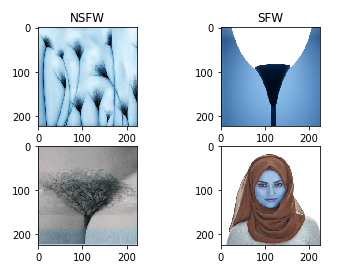

Link 1: https://neurohive.io/en/popular-networks/alexnet-imagenet-classification-with-deep-convolutional-neural-networks/#:~:text=AlexNet%20is%20the%20name%20of,second%20place)%20error%20rates).  
Link 2: https://github.com/kjanjua26/Are_Neural_Nets_Dirty

---------------------------------------

5. SVM, MLP, and KNN:

> **Introduction**:  
This method revolves around creating a CNN based model for video feature extraction, validating these features with baseline models for NSFW video classification using a multi-modal approach. 

> **Computational requirements**:  
Computationally expensive, but then this method involves extracting images from videos and then assigning them to categories, it also involves finding NSFW audio. Additionally, it uses a bi-modal approach.

> **Implementation - methods and procedures**:
The researchers decode each video at 1 frame-per-second up to the first 360 seconds and feed an InceptionV3 with the network weights pre-trained in the ImageNet10 to extract the image embeddings. They also feed the AudioVGG with the network weights pre-trained in the Audioset11 to extract the audio embeddings. Next, they apply PCA (+whitening) to reduce the dimensions of the image embeddings to 1024 and
audio embeddings to 128. Finally, they concatenate both image and
audio embeddings to compose the final video embeddings with
1152 dimensions.  
-> SVM hyper-parameters: C: 1.0, decision function shape: ’ovr’,
degree: 3, gamma: ’scale’, kernel: ’rbf’, max iterations: -1, random state: None, shrinking: True and tolerance: 0.001.  
-> KNN hyper-parameters: leaf size 30, used the minkowski metric,
k = 5 , p = 2 and uniform weights.  
-> MLP hyper-parameters: two hidden layers, the first one with
2000 neurons, and the second one with 3200, RelU activation,
xavier initialization, adam optimizer, 0.001 learning rate, and
softmax cross entropy loss function.

The resulting scores and accuracies are as follows: 

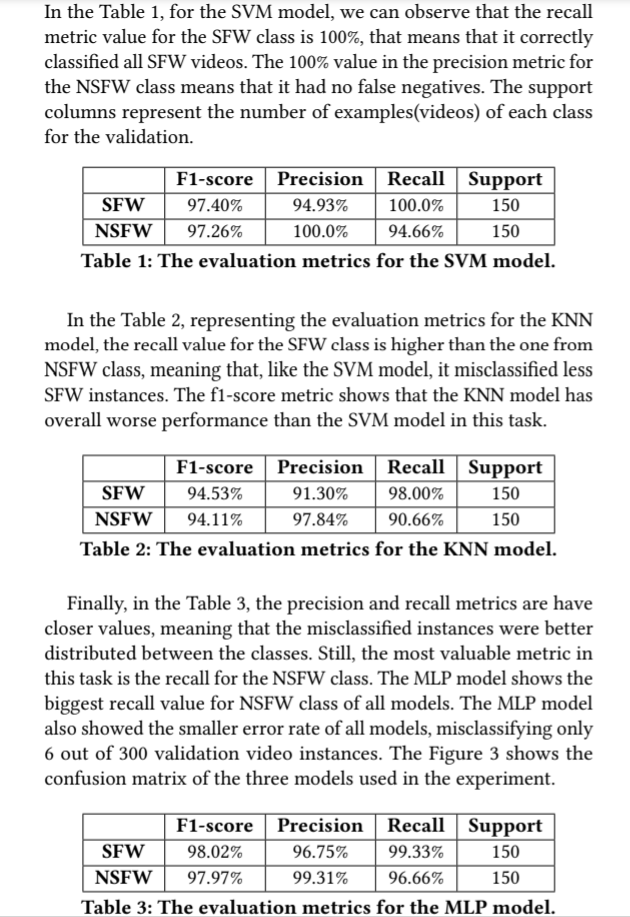  
Link: https://sci-hub.do/https://doi.org/10.1145/3323503.3360625

---------------------------------------


6. [Bonus] Existing API:

> **Introduction**:
This is a fully functional Open-Source Content Moderation service with ReactJS based Admin Panel. It uses Restful APIs and has a ready-to-use mobile-first react JS moderation application.

Link: https://blog.sashido.io/content-moderation-service-with-nodejs-tensorflowjs-and-reactjs-part-1-restful-api-service/#thesolution

# **Which method would I consider implementing?**

The first architecture I would consider implementing is the Mobile Net architecture. Two reasons for this: 

a) it has less hyper-parameters, so fine tuning is relatively easier (I will be using Grid Search), and  
b) it is computationally quite inexpensive and can work with mobile systems, Android/iOS applications. 

After recording the performance, I would ideally like to implement the DenseNet 50 1by2 architecture because it seems doable in my laptop. In all honesty, after following up on the previous microtask discussions which highlights the problems that arise with Caffe, and issues like potential adversarial attacks, I might try tweaking and implementing the architecture in a different way. Either way, I will be documenting my thinking process. 

My method of approach, deduced from the articles and research works that I read, will be that of transfer learning, with the networks initially trained on the ImageNet dataset. 

I am definitely open to new thinking trajectories and architectures, and would love to implement something new altogether, in collaboration with my mentor. I would also like to thank the fellow participants for asking some good queries (such as the very nature of this classifier), I have addressed them, to an extent,in this report.